<a href="https://colab.research.google.com/github/DanulR/Danul-Rochana-AI-Projects/blob/main/Movie_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mov = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/movies.csv')

In [ ]:
rat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/ratings.csv')

In [ ]:
mov.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
rat.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [ ]:
mov.shape

(10329, 3)

In [ ]:
rat.shape

(105339, 4)

In [ ]:
#Understanding of distribution of the features available

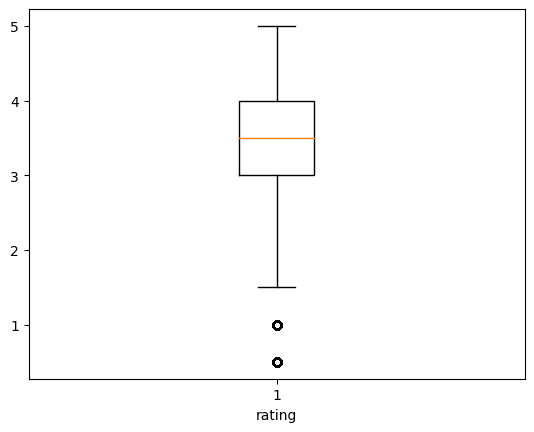

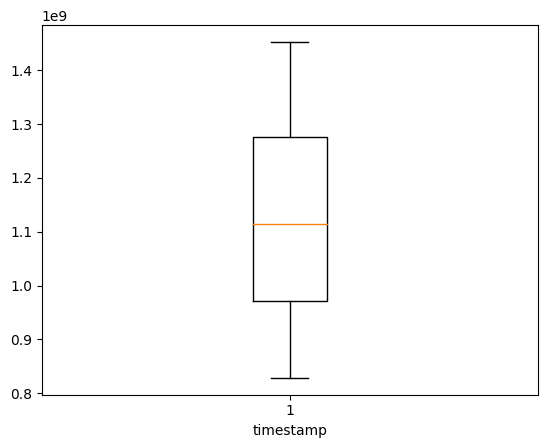

In [ ]:
rat_cols = ['rating','timestamp']
for cols in rat_cols:
    plt.figure()
    plt.boxplot(rat[cols])
    plt.xlabel(cols)



In [ ]:
#Rating has few outliers

In [ ]:
#Finding unique users and movies

In [ ]:
genre = mov['genres'].str.split('|',expand=True).stack().value_counts()

In [ ]:
unique_users = rat['userId'].nunique()
print('Number of unique users:',unique_users)

Number of unique users: 668


In [ ]:
movies = mov['title'].unique().tolist()
print('Unique movies:',movies)

Unique movies: ['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)', 'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)', 'Sudden Death (1995)', 'GoldenEye (1995)', 'American President, The (1995)', 'Dracula: Dead and Loving It (1995)', 'Balto (1995)', 'Nixon (1995)', 'Cutthroat Island (1995)', 'Casino (1995)', 'Sense and Sensibility (1995)', 'Four Rooms (1995)', 'Ace Ventura: When Nature Calls (1995)', 'Money Train (1995)', 'Get Shorty (1995)', 'Copycat (1995)', 'Assassins (1995)', 'Powder (1995)', 'Leaving Las Vegas (1995)', 'Othello (1995)', 'Now and Then (1995)', 'Persuasion (1995)', 'City of Lost Children, The (Cité des enfants perdus, La) (1995)', 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'Dangerous Minds (1995)', 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'Wings of Courage (1995)', 'Babe (1995)', 'Carrington (1995)', 'Dead Man Walking (1995)', 'Clueless (1995)', 'Cry, the Beloved Cou

In [ ]:
#Average rating and Total movies at genre level.

In [ ]:
genre

Drama                 5220
Comedy                3515
Thriller              2187
Romance               1788
Action                1737
Crime                 1440
Adventure             1164
Horror                1001
Sci-Fi                 860
Mystery                675
Fantasy                670
Children               540
War                    503
Documentary            415
Musical                409
Animation              401
Western                235
Film-Noir              195
IMAX                   152
(no genres listed)       7
Name: count, dtype: int64

Text(0, 0.5, 'Number of movies')

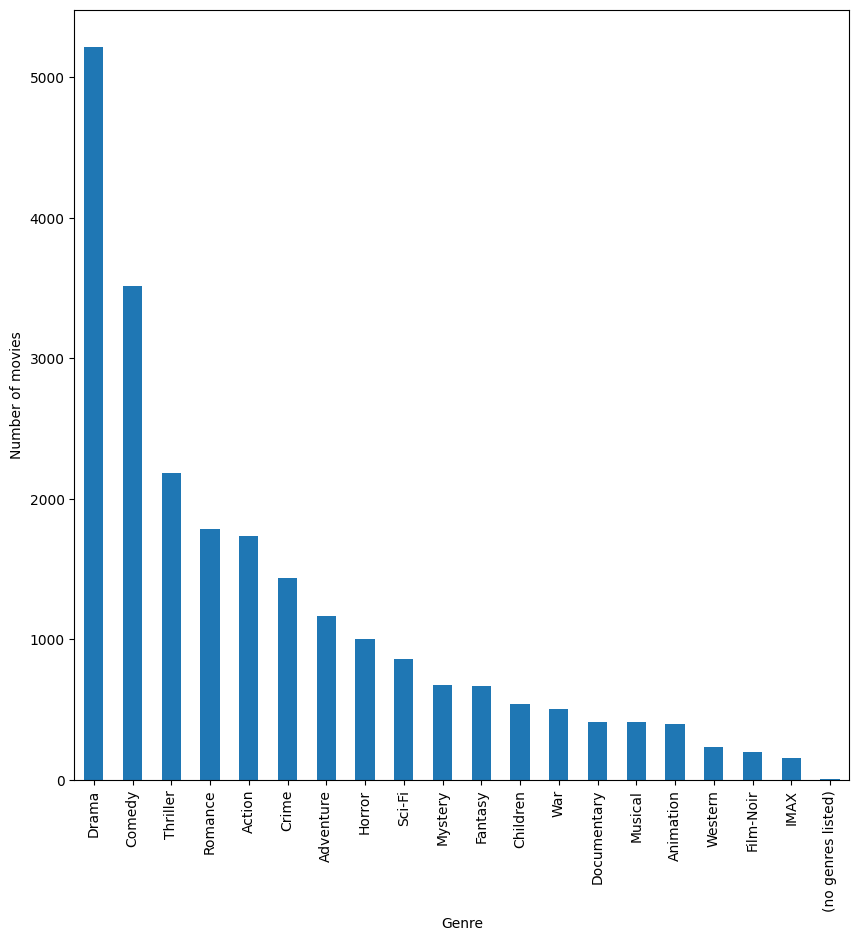

In [ ]:
genre.plot(kind='bar',figsize=(10,10))
plt.xlabel('Genre')
plt.ylabel('Number of movies')

In [ ]:
avg_rat = rat['rating'].mean()
print('Average rating:',avg_rat)

Average rating: 3.5168503593161127


In [ ]:
count = rat['rating'].value_counts()

Text(0.5, 1.0, 'rating pie chart')

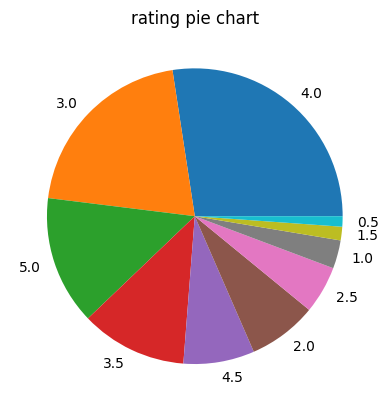

In [ ]:
plt.pie(count,labels=count.index)
plt.title('rating pie chart')

In [ ]:
#popularity-basedrecommender system at a genre level.

In [ ]:
#merging the two dataframes

In [ ]:
df = pd.merge(mov,rat,on='movieId')
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148


In [ ]:
mov[mov['genres'].str.contains('Drama')]

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance
...,...,...,...
10319,144482,Circle (2015),Drama|Horror|Sci-Fi
10320,144656,The Measure of a Man (2015),Drama
10322,146344,Elämältä kaiken sain ( ),Comedy|Drama
10323,146656,Creed (2015),Drama


In [ ]:
df1 = df[['title','rating']].groupby('title').mean().reset_index()

In [ ]:
df1

,title,rating
0,'71 (2014),3.500000
1,'Hellboy': The Seeds of Creation (2004),3.000000
2,'Round Midnight (1986),2.500000
3,'Til There Was You (1997),4.000000
4,"'burbs, The (1989)",3.125000
...,...,...
10318,loudQUIETloud: A Film About the Pixies (2006),4.500000
10319,xXx (2002),2.958333
10320,xXx: State of the Union (2005),2.071429
10321,¡Three Amigos! (1986),3.012500


In [ ]:
df1.rename(columns={'rating':'avg_rating'},inplace=True)

In [ ]:
df2 = pd.merge(df1,df,on='title')

In [ ]:
df2

,title,avg_rating,movieId,genres,userId,rating,timestamp
0,'71 (2014),3.5000,117867,Action|Drama|Thriller|War,458,3.5,1426074834
1,'Hellboy': The Seeds of Creation (2004),3.0000,97757,Action|Adventure|Comedy|Documentary|Fantasy,251,3.0,1363372860
2,'Round Midnight (1986),2.5000,26564,Drama|Musical,668,2.5,1173424491
3,'Til There Was You (1997),4.0000,779,Drama|Romance,118,3.0,1045334734
4,'Til There Was You (1997),4.0000,779,Drama|Romance,160,4.0,902695520
...,...,...,...,...,...,...,...
105334,¡Three Amigos! (1986),3.0125,2478,Comedy|Western,605,2.0,955398608
105335,¡Three Amigos! (1986),3.0125,2478,Comedy|Western,607,4.0,974784682
105336,¡Three Amigos! (1986),3.0125,2478,Comedy|Western,627,3.0,1237990707
105337,¡Three Amigos! (1986),3.0125,2478,Comedy|Western,668,2.0,1025887194


In [ ]:
df3 = df[['title','rating']].groupby('title').count().reset_index()

In [ ]:
df3

,title,rating
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),1
3,'Til There Was You (1997),3
4,"'burbs, The (1989)",20
...,...,...
10318,loudQUIETloud: A Film About the Pixies (2006),1
10319,xXx (2002),24
10320,xXx: State of the Union (2005),7
10321,¡Three Amigos! (1986),40


In [ ]:
df3.rename(columns={'rating':'count'},inplace=True)

In [ ]:
df2 = pd.merge(df3,df2,on='title')

In [ ]:
df2

,title,count,avg_rating,movieId,genres,userId,rating,timestamp
0,'71 (2014),1,3.5000,117867,Action|Drama|Thriller|War,458,3.5,1426074834
1,'Hellboy': The Seeds of Creation (2004),1,3.0000,97757,Action|Adventure|Comedy|Documentary|Fantasy,251,3.0,1363372860
2,'Round Midnight (1986),1,2.5000,26564,Drama|Musical,668,2.5,1173424491
3,'Til There Was You (1997),3,4.0000,779,Drama|Romance,118,3.0,1045334734
4,'Til There Was You (1997),3,4.0000,779,Drama|Romance,160,4.0,902695520
...,...,...,...,...,...,...,...,...
105334,¡Three Amigos! (1986),40,3.0125,2478,Comedy|Western,605,2.0,955398608
105335,¡Three Amigos! (1986),40,3.0125,2478,Comedy|Western,607,4.0,974784682
105336,¡Three Amigos! (1986),40,3.0125,2478,Comedy|Western,627,3.0,1237990707
105337,¡Three Amigos! (1986),40,3.0125,2478,Comedy|Western,668,2.0,1025887194


In [ ]:
df = df2.drop(columns=['userId','rating','timestamp','movieId'])

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.rename(columns={'avg_rating':'Average movie rating','count':'Num reviews'})

In [ ]:
#Example:Input:•Genre (g) : Drama
#              •Minimum rating threshold(t): 4.0
#              •Num recommendations (N) : 7

In [ ]:
genre = input('Enter genre:')
min_thr = input('Enter minimum rating threshold as a decimal:')
no_re = input('Enter number of recommendations needed:')

Enter genre:Drama
Enter minimum rating threshold as a decimal:4.0
Enter number of recommendations needed:6


In [ ]:
min_thr = float(min_thr)
no_re = int(no_re)

In [ ]:
df4 = df[(df['genres'].str.contains(genre)) & (df['Average movie rating']>min_thr)]
df4.head(no_re)

,title,Num reviews,Average movie rating,genres
252,10th & Wolf (2006),1,4.500000,Crime|Drama|Thriller
265,12 Angry Men (1957),63,4.182540,Drama
478,1900 (Novecento) (1976),2,4.250000,Drama|War
484,1984 (1956),2,4.250000,Drama|Sci-Fi
1014,3 Idiots (2009),3,4.666667,Comedy|Drama|Romance
1148,"39 Steps, The (1935)",23,4.108696,Drama|Mystery|Thriller


In [ ]:
#content-based recommender system that recommends top N movies based on similar movie(m) genres.

In [ ]:
df = pd.merge(mov,rat,on='movieId')

In [ ]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148


In [ ]:
#vectorizing the genre column using TF-IDF

In [ ]:
tf_vect = TfidfVectorizer(min_df=1,lowercase=True,stop_words='english')
y = tf_vect.fit_transform(df['genres'])

In [ ]:
tf_df = pd.DataFrame(y.toarray(),columns=tf_vect.get_feature_names_out())
tf_df

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,imax,listed,musical,mystery,noir,romance,sci,thriller,war,western
0,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105335,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105336,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105337,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
combined = tf_df.sum(axis=1)

In [ ]:
combined_df = pd.DataFrame({'combined_vector':combined})

In [ ]:
combined_df

,combined_vector
0,2.181913
1,2.181913
2,2.181913
3,2.181913
4,2.181913
...,...
105334,1.000000
105335,1.000000
105336,1.000000
105337,1.000000


In [ ]:
dfn = pd.concat([df,combined_df],axis=1)
dfn

,movieId,title,genres,userId,rating,timestamp,combined_vector
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895,2.181913
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039,2.181913
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933,2.181913
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810,2.181913
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286,2.181913
...,...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043,1.000000
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749,1.000000
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664,1.000000
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148,1.000000


In [ ]:
piv = dfn.pivot_table(index='userId',columns='title',values='combined_vector')

In [ ]:
piv

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.986692,NaN,NaN,NaN,NaN,NaN


In [ ]:
movie_name = input('Enter Movie Name:')
no_of_recomm = int(input('Enter no of recommendations:'))

Enter Movie Name:Toy Story (1995)
Enter no of recommendations:5


In [ ]:
movie_user_genre = piv[movie_name]

In [ ]:
similar_to_movie = piv.corrwith(movie_user_genre)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [ ]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


In [ ]:
corr_movie = pd.DataFrame(similar_to_movie, columns =['Correlation'])
corr_movie.dropna(inplace = True)
corr_movie = corr_movie.join(ratings['num of ratings'])
corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation', ascending = False).head(no_of_recomm)

,Correlation,num of ratings
title,,
Full Metal Jacket (1987),1.0,111
"Dark Knight, The (2008)",1.0,127
Indiana Jones and the Temple of Doom (1984),1.0,109
Dumb & Dumber (Dumb and Dumber) (1994),1.0,149
Toy Story (1995),1.0,232


In [ ]:
#collaborative based recommender system which recommends top N movies based on “K” similar users for a target user “u”

In [ ]:
df = pd.merge(mov,rat,on='movieId')

In [ ]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [ ]:
df['genres'] = df['genres'].str.replace('|',' ')

In [ ]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,14,4.0,851766286
...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148


In [ ]:
tf_vect = TfidfVectorizer(min_df=1,lowercase=True,stop_words='english')

In [ ]:
y = tf_vect.fit_transform(df['genres'])

In [ ]:
y.shape

(105339, 23)

In [ ]:
tf_df = pd.DataFrame(y.toarray(),columns=tf_vect.get_feature_names_out())

In [ ]:
tf_df

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,imax,listed,musical,mystery,noir,romance,sci,thriller,war,western
0,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105335,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105336,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105337,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cols = ['rating','movieId','timestamp']
df2 = df[cols]
df2

,rating,movieId,timestamp
0,5.0,1,859046895
1,4.0,1,1303501039
2,5.0,1,858610933
3,4.0,1,850815810
4,4.0,1,851766286
...,...,...,...
105334,3.0,148238,1451213043
105335,4.0,148626,1452014749
105336,4.5,148626,1451687664
105337,4.5,148626,1451148148


In [ ]:
pd.set_option('display.max_columns',None)


In [ ]:
target = df['userId']

In [ ]:
df3 = pd.concat([df2,tf_df],axis=1)
df3

,rating,movieId,timestamp,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,film,genres,horror,imax,listed,musical,mystery,noir,romance,sci,thriller,war,western
0,5.0,1,859046895,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,1,1303501039,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,1,858610933,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1,850815810,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1,851766286,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,3.0,148238,1451213043,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105335,4.0,148626,1452014749,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105336,4.5,148626,1451687664,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105337,4.5,148626,1451148148,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df3,target,test_size=0.1,random_state=42)

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
#Building a knn model considering threshold for similar users as 100 (k=100)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)

In [ ]:
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred)

0.7301120182266945

In [ ]:
final = knn.predict(df3)

In [ ]:
final

array([648,   5,   8, ..., 647, 247, 247])

In [ ]:
len(final)

105339

In [ ]:
df3['predicted_userId'] = final

In [ ]:
df3

,rating,movieId,timestamp,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,film,genres,horror,imax,listed,musical,mystery,noir,romance,sci,thriller,war,western,predicted_userId
0,5.0,1,859046895,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,648
1,4.0,1,1303501039,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,5.0,1,858610933,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,4.0,1,850815810,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
4,4.0,1,851766286,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,3.0,148238,1451213043,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247
105335,4.0,148626,1452014749,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114
105336,4.5,148626,1451687664,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,647
105337,4.5,148626,1451148148,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247


In [ ]:
user_Id = df3[df3['predicted_userId']==648]

In [ ]:
user_Id

,rating,movieId,timestamp,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,film,genres,horror,imax,listed,musical,mystery,noir,romance,sci,thriller,war,western,predicted_userId
0,5.0,1,859046895,0.000000,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.000000,0.468004,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,648
193,5.0,1,859156007,0.000000,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.000000,0.468004,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,648
225,5.0,1,859029646,0.000000,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.000000,0.468004,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,648
324,2.0,3,859046959,0.000000,0.000000,0.000000,0.000000,0.597592,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.801800,0.00000,0.000000,0.0,0.0,648
373,3.0,3,859156049,0.000000,0.000000,0.000000,0.000000,0.597592,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.801800,0.00000,0.000000,0.0,0.0,648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35709,4.0,1356,859047091,0.388575,0.441477,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.49717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.49717,0.399689,0.0,0.0,648
35784,4.0,1356,859156128,0.388575,0.441477,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.49717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.49717,0.399689,0.0,0.0,648
35797,4.0,1356,859029802,0.388575,0.441477,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.49717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.49717,0.399689,0.0,0.0,648
35823,4.0,1357,859156420,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.555274,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.831668,0.00000,0.000000,0.0,0.0,648


In [ ]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,14,4.0,851766286
...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148


In [ ]:
movie_map_cols = ['movieId','title']

In [ ]:
movie_map = df[movie_map_cols]

In [ ]:
movie_map

,movieId,title
0,1,Toy Story (1995)
1,1,Toy Story (1995)
2,1,Toy Story (1995)
3,1,Toy Story (1995)
4,1,Toy Story (1995)
...,...,...
105334,148238,A Very Murray Christmas (2015)
105335,148626,The Big Short (2015)
105336,148626,The Big Short (2015)
105337,148626,The Big Short (2015)


In [ ]:
df4 = pd.concat([df3,movie_map],axis=1)

In [ ]:
df4

,rating,movieId,timestamp,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,film,genres,horror,imax,listed,musical,mystery,noir,romance,sci,thriller,war,western,predicted_userId,movieId,title
0,5.0,1,859046895,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,648,1,Toy Story (1995)
1,4.0,1,1303501039,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,Toy Story (1995)
2,5.0,1,858610933,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,1,Toy Story (1995)
3,4.0,1,850815810,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1,Toy Story (1995)
4,4.0,1,851766286,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117,1,Toy Story (1995)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,3.0,148238,1451213043,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247,148238,A Very Murray Christmas (2015)
105335,4.0,148626,1452014749,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114,148626,The Big Short (2015)
105336,4.5,148626,1451687664,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,647,148626,The Big Short (2015)
105337,4.5,148626,1451148148,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247,148626,The Big Short (2015)


In [ ]:
df4 = df4.drop_duplicates()

In [ ]:
df4

,rating,movieId,timestamp,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,film,genres,horror,imax,listed,musical,mystery,noir,romance,sci,thriller,war,western,predicted_userId,movieId,title
0,5.0,1,859046895,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,648,1,Toy Story (1995)
1,4.0,1,1303501039,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,Toy Story (1995)
2,5.0,1,858610933,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,1,Toy Story (1995)
3,4.0,1,850815810,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1,Toy Story (1995)
4,4.0,1,851766286,0.0,0.360501,0.554123,0.510391,0.288894,0.0,0.0,0.0,0.468004,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117,1,Toy Story (1995)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,3.0,148238,1451213043,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247,148238,A Very Murray Christmas (2015)
105335,4.0,148626,1452014749,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114,148626,The Big Short (2015)
105336,4.5,148626,1451687664,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,647,148626,The Big Short (2015)
105337,4.5,148626,1451148148,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247,148626,The Big Short (2015)


In [ ]:
#Example:Input:•UserID:50
#              •Num recommendations(N):10

In [ ]:
user_id = int(input('Enter the userId:'))
no_of_recommendations = int(input('Enter the number of recommendations needed:'))

Enter the userId:50
Enter the number of recommendations needed:10


In [ ]:
df4[df4['predicted_userId']==user_id][['predicted_userId','title']].drop_duplicates().head(no_of_recommendations)

,predicted_userId,title
14,50,Toy Story (1995)
1032,50,Sense and Sensibility (1995)
1902,50,Babe (1995)
2033,50,Dead Man Walking (1995)
2374,50,Seven (a.k.a. Se7en) (1995)
2633,50,"Usual Suspects, The (1995)"
3582,50,"Hate (Haine, La) (1995)"
4047,50,Taxi Driver (1976)
4595,50,Apollo 13 (1995)
5184,50,Crimson Tide (1995)


In [ ]:
#Enter another userid and try if the result is empty